
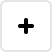
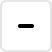
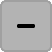
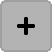
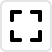
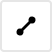
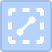
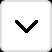
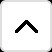
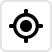

In [1]:
from lets_plot import *
from lets_plot.mapping import *

LetsPlot.setup_html() 

In [2]:
blank_theme = theme(line=element_blank(), axis=element_blank())

In [3]:
w,h = 400,250

tooltip_content = (
    layer_tooltips()
        .line('count|@{..count..} (@{..prop..})')
        .line('total|@{..sum..}')
        .format('..prop..', '.0%')
        .format('..count..', '.1f')
        .format('..sum..', '.1f')
)

def bar_and_pie(bar_plot, pie_plot):
    bunch = GGBunch()
    bunch.add_plot(bar_plot, 0, 0)
    bunch.add_plot(pie_plot + blank_theme, w, 0)
    return bunch.show()


In [4]:
df = {
  'name':  ['a', 'b', 'c', 'd', 'b'],
  'value': [40,   90, 10,  50,  20 ],
}

p = ggplot(df) + ggsize(w,h)

In [5]:
# data as is - stat identity

bar_and_pie(
    p + geom_bar(aes(x='name', y='value', fill='name'), stat='identity'),
    p + geom_pie(aes(slice='value', fill='name'), size=10, stat='identity', stroke=1)
)

In [6]:
# count 

bar_and_pie(
    p + geom_bar(aes(x='name', fill='name')),
    p + geom_pie(aes(fill='name'), size=10, stroke=1, tooltips=tooltip_content)
)

In [7]:
# sum

bar_and_pie(
    p + geom_bar(aes(x='name', fill='name', weight='value')),
    p + geom_pie(aes(fill='name', weight='value'), stroke=1, size=10, tooltips=tooltip_content)
)

In [8]:
# sum + ordering

bar_and_pie(
    p + geom_bar(aes(x='name', fill=as_discrete('name', order_by='..count..'), weight='value')),
    p + geom_pie(
        aes(fill=as_discrete('name', order_by='..count..'), weight='value'),
        stroke=1, size=10,
        tooltips=tooltip_content
    )
)

In [9]:
df2 = {
    'x': [1, 1, 1, 1, 1, 1.5, 1.5,   2,   2,   2 ],
    'y': [1, 1, 1, 1, 1,   2,   2, 1.5, 1.5, 1.5],
    's': [3, 1, 2, 1, 4,   1,   3,   3,   3,  1],
    'n': ['a', 'b', 'a', 'c', 'a',  'a', 'b', 'c', 'a',  'b']
}

p2 = ggplot(df2) + xlim(0.5,2.5) + ylim(0.5,2.5)
 
p2 + geom_pie(aes('x', 'y', slice='s', fill='n'), size=10, hole=0.3, stat='identity') 

In [10]:
p2 + geom_pie(aes('x', 'y', fill=as_discrete('n', order_by='..count..', order=-1), weight='s'), 
              size=10, hole=0.3) 

In [11]:
# Map total count in each point to size

p2 + geom_pie(aes('x', 'y', fill=as_discrete('n', order_by='..count..', order=-1), weight='s', size='..sum..'),
              hole=0.3, tooltips=tooltip_content) 

In [12]:
import pandas as pd

mpg_df = pd.read_csv ("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head()

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

In [13]:
p3 = ggplot(mpg_df) + ggsize(400,300)

In [14]:
ordered_class = as_discrete('class', order_by='..count..')

bar_and_pie(
    p3 + geom_bar(aes(x='class', fill=ordered_class)), 
    p3 + geom_pie(aes(fill=ordered_class), size=10, hole=0.3)
)

In [15]:
bar_and_pie(
    p3 + geom_bar(aes(x='class', fill=ordered_class, weight ='displ')), 
    p3 + geom_pie(aes(fill=ordered_class,  weight='displ'), size=10, hole=0.3, tooltips=tooltip_content)
)

In [16]:
ggplot(mpg_df) + blank_theme + \
    geom_pie(aes(fill=ordered_class,  weight='displ', size='..sum..'), hole=0.3, tooltips=tooltip_content) + \
    facet_grid(x='year') + \
    scale_size(range=[5, 10]) + \
    guides(size='none') 

In [17]:
ggplot(mpg_df) + blank_theme + \
    geom_pie(aes(fill=as_discrete('drv', order=1), size='..sum..'), tooltips=tooltip_content) + \
    facet_wrap(facets='trans', ncol=5) + \
    scale_size(range=[2, 10]) + \
    guides(size='none') 

In [18]:
length = {
  'name' : ['20-50 km', '50-75 km', '10-20 km', '75-100 km', '3-5 km', '7-10 km', '5-7 km', '>100 km', '2-3 km'],
  'count': [1109, 696, 353, 192, 168, 86, 74, 65, 53],
  'explode': [0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6]
}

ggplot(length) + blank_theme + \
    geom_pie(aes(fill='name', slice='count', explode='explode'), stat='identity',
            stroke=1, stroke_color='black', size=20) + \
    scale_fill_gradient(low='dark_blue', high='light_green') 

In [19]:
calories = {
    'slice': [35, 25, 25, 15],
    'label': ["Apples", "Bananas", "Cherries", "Dates"],
    'explode': [0.1, 0, 0, 0]
}

p4 = ggplot(calories) + \
    blank_theme + \
    scale_fill_brewer(palette='Set1') + \
    ggsize(w, h)

p_pie = p4 + \
    geom_pie(aes(fill='label', slice='slice', explode='explode'), stat='identity', size=18)

p_donut = p4 + \
    geom_pie(aes(fill='label', slice='slice', explode='explode'), stat='identity', hole=0.8, size=18)

bunch = GGBunch()
bunch.add_plot(p_pie + theme(legend_position='none'), 0, 0)
bunch.add_plot(p_donut, w, 0)
bunch

In [20]:
import pandas as pd

referendum_df = pd.read_csv("data/montenegrin_referendum_2006.csv")
referendum_df.head()

Municipality    Yes   Yes%     No    No%  Registered  Voted  Voted%
0   Andrijevica   1084  27.60   2824  71.89        4369   3928   89.91
1           Bar  16640  63.07   9496  35.99       32255  26382   81.79
2        Berane  11268  46.85  12618  52.46       28342  24051   84.86
3  Bijelo Polje  19405  55.36  15437  44.04       40110  35051   87.39
4         Budva   5908  52.75   5180  46.25       12797  11200   87.52

In [21]:
from lets_plot.geo_data import *

country = 'Montenegro'
geocoder = geocode_states(names=referendum_df['Municipality']).scope(country)

boundaries = geocoder.get_boundaries(resolution=15)

centroids = geocoder.get_centroids()

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [22]:
boundaries = pd.merge(boundaries, referendum_df[['Municipality','Yes%']], left_on='state', right_on='Municipality')
boundaries.head()

state            found name  \
0   Andrijevica   Opština Andrijevica   
1           Bar           Opština Bar   
2        Berane        Opština Berane   
3  Bijelo Polje  Opština Bijelo Polje   
4         Budva         Opština Budva   

                                            geometry  Municipality   Yes%  
0  MULTIPOLYGON (((19.61901 42.80456, 19.63347 42...   Andrijevica  27.60  
1  MULTIPOLYGON (((18.98948 42.16385, 18.98910 42...           Bar  63.07  
2  MULTIPOLYGON (((19.61729 42.88021, 19.62012 42...        Berane  46.85  
3  MULTIPOLYGON (((19.41061 43.07992, 19.41992 43...  Bijelo Polje  55.36  
4  MULTIPOLYGON (((18.80014 42.28039, 18.79997 42...         Budva  52.75

In [23]:
fill_colors = ['#a50026', '#d73027', '#66bd63', '#4daf4a','#006837']

plot_map = ggplot() + \
    geom_map(aes(fill="Yes%"), data=boundaries,
             tooltips=layer_tooltips()
                         .title('@state')
                         .line('\'Yes\' votes|@{Yes%}')
                         .format('Yes%', '{} %')) + \
    scale_fill_gradientn(fill_colors) + \
    blank_theme + \
    ggtitle("Results of the Montenegrin independence referendum, 2006") + \
    ggsize(800, 700) 
plot_map

In [24]:
centroids["Lon"] = centroids.centroid.map(lambda p: p.x)
centroids["Lat"] = centroids.centroid.map(lambda p: p.y)
centroids.head()

state            found name                   geometry        Lon  \
0   Andrijevica   Opština Andrijevica  POINT (19.75457 42.72200)  19.754574   
1           Bar           Opština Bar  POINT (19.20254 42.13654)  19.202541   
2        Berane        Opština Berane  POINT (19.83309 42.83042)  19.833091   
3  Bijelo Polje  Opština Bijelo Polje  POINT (19.69209 43.07875)  19.692087   
4         Budva         Opština Budva  POINT (18.92020 42.25940)  18.920197   

         Lat  
0  42.721999  
1  42.136541  
2  42.830423  
3  43.078748  
4  42.259399

In [25]:
mref_df = pd.merge(referendum_df, centroids, left_on='Municipality', right_on='state')

# Blank or invalid votes:
mref_df["Blank"] = mref_df["Voted"] - mref_df["Yes"] - mref_df["No"]

mref_df = mref_df[["Municipality", "Lat", "Lon", "Registered", "No", "Yes", "Blank"]]

id_vars = ["Municipality", "Lat", "Lon", "Registered"]
mref_df = pd.melt(frame=mref_df, id_vars=id_vars, var_name="Vote", value_name="Number")
mref_df

Municipality        Lat        Lon  Registered   Vote  Number
0    Andrijevica  42.721999  19.754574        4369     No    2824
1            Bar  42.136541  19.202541       32255     No    9496
2         Berane  42.830423  19.833091       28342     No   12618
3   Bijelo Polje  43.078748  19.692087       40110     No   15437
4          Budva  42.259399  18.920197       12797     No    5180
..           ...        ...        ...         ...    ...     ...
58        Rožaje  42.867498  20.189932       19646  Blank      90
59        Šavnik  42.978774  19.167139        2306  Blank      20
60         Tivat  42.420394  18.719759       10776  Blank      91
61        Ulcinj  41.964853  19.315472       17117  Blank     137
62       Žabljak  43.129320  19.153180        3407  Blank      24

[63 rows x 6 columns]

In [26]:
plot_map + \
    geom_pie(aes(color='Vote', slice='Number'), 
             data=mref_df, stat='identity', 
             fill_by='color', size=5, stroke=1.5,
             map=centroids, map_join=['Municipality','state']) + \
    scale_color_manual(values=[ "#e41a1c","#4daf4a", "#999999"])

In [27]:
plot_map + \
    geom_pie(aes('Lon', 'Lat', color='Vote', weight='Number', size='..sum..', group='Municipality'),
             data=mref_df,
             fill_by='color', hole=0.2, stroke=1.5,
             tooltips=layer_tooltips()
                      .title('@Municipality')
                      .line('Vote|@Vote')
                      .line('Number|@{..count..}')
                      .line('Percent|@{..prop..}')
                      .line('Total voted|@{..sum..}')
                      .line('Registered|@Registered')
                      .format('..prop..', '.2%')
                      .format('Registered', ',d')) + \
    scale_color_manual(values=['#e41a1c','#4daf4a', '#999999']) + \
    scale_size(name='Total voted', range=[3, 8])